# Теория сложных сетей в экономике

# Лекция 4: Выявление сообществ в сетях

## Часть 1. Введение и основные алгоритмы.

## Макрушин Сергей Вячеславович, Финансовый университет, 2020 г.
v 0.4

__Сообщество в сети__


<em class="qs"></em> Какими свойствами обладает сообщество? 

Свойства, характерные
для сообществ в социальных сетях $^1$:
* <em class="cb">Взаимность связей.</em>  Все (почти все) члены сообщества связаны друг с другом.
* <em class="cb">Компактность.</em>  Малое расстояние между членами группы (в переходах по связям)
* <em class="cb">Плотность связей.</em>  Высокая плотность связей внутри группы.
* <em class="cb">Разделенность.</em>  Высокая плотность связей внутри группы по сравнению со связями с внешними членами.
--------
$^1$: S. Wasserman, K. Faust, 1994

__Приложения использования выявлвенных сообществ__

Выявленные сообщества могут использоваться для:
* Понимание взамиосвязи между узлами
* Разметка сетей для визуализации и навигации по большим (и гиганстким) сетям
* Предтказение (рекомендация) связей
* База для других задач, таких как data mining в сетях

__Подходы к выделению сообществ__

// Заменить!

<em class="cb">Определения сообществ могут быть __субъективными__</em>
* критерии качества разбиения зависят от решаемых задач
* редко имеются примеры для валидации (где есть объективно зафиксированное разделение на сообщества)
    
Можно выделить 4 пересекающихся категори методов выявления сообществ $^2$:

1. <em class="cb">Узло-центричные (node-centric) сообщества</em> - все узлы сообества удовлетворяют некоторым критериям
2. <em class="cb">Сете-центричные (network-centric) сообщества</em> - задача разбиения сети в целом на несколько непересекающихся множеств
    * (+ 1) Node Similarity
    * (+ 1) Latent Space Models
    * (+ 2) Modularity maximization
    * Cut Minimization
    * Block-Model Approximation

0. <em class="cb">Группо-центричные (group-centric) сообщества</em> - рассматриваются связи внутри группы, группа в целом (не опускаясь до уровня узлов) удовлетворяет определенным критериям
0. <em class="cb">Иерархо-центричные (hierarchy-centric) сообщества</em> - построение иерархической структуры сообществ

----------
$^2$: Huan Liu, Lei Tang, Nitin Agarwal

## Узло-центричные алгоритмы выявления сообществ

__Узло-центричные подходы к выделению сообществ__

* <em class="cb">Взаимность связей.</em>  Все (почти все) узлы сообщества связаны друг с другом.
    * клика (cliques)
* <em class="cb">Достижимость членов сообщества.</em> Узлы сообщества расположены близко друг к другу.
    * k-клика (k-clique)
    * k-клуб (k-club)
* <em class="cb">Степени узлов.</em> Все узлы сообщества связаны с определенным количеством узлов внутри сообщества.
    * k-ядро (k-core)

__Клики__

<em class="df"></em> __Клика (clique)__ это полный (полносвязный) подграф, т.е. множество узлов в котором каждая пара узлов связана.

<center>     
<img src="clust_01.png" alt="клики в графе" style="width: 450px;"/>
__Пример клик в графе__
</center>

* <em class="hn"></em> Клики в графе могут пересекаться.


* <em class="df"></em> __Максимальная клика (maximal clique)__ - клика которая не может быть увеличена за счет добавления еще одного узла (т.е. не включена в клику большего размера)
* <em class="df"></em> __Maximum clique__ - клика максимального размера во всей сети, размер этой клики - graph clique number.
* <em class="cb">Поиск клик в сети вычислительно очень сложен.</em> Например сложность поиска клик размера $k$: $O(n^k k^2)$

__k-клики__

<em class="df"></em> __k-клика (k-clique)__: наибольшая подсеть, в которой расстояния между узлами $\le k$
* <em class="hn"></em> диаметр k-клики может быть больше $k$
    * <em class="ex"></em> 2-клика: $\{12, 4, 10, 1, 6\}$ (см. рис.), расстояние в клике $d(1, 6)=3$

<center>     
<img src="clust_04.png" alt="Пример 2-клики" style="width: 300px;"/>
__Пример 2-клики__
</center>

<em class="df"></em>__k-клуб (k-club)__: подсеть, с димаетром $\le k$
* <em class="ex"></em> 2-клубы (см. рис.): $\{1,2,5,6,8,9\}$, $\{12, 4, 10, 1\}$ 

__Ядра в графе__

<em class="df"></em> __k-ядро (k-core)__ - наибольшая подсеть в которой, каждый узел как минимум соединен с $k$ другими узлами в данной подсети.
* <em class="hn"></em> каждый узел в k-ядре имеет степень $k_i \ge k$ 
* <em class="hn"></em> $(k+1)$-ядро всегоя подсеть $k$-ядра
* Ядерное число (core number) узла это наивысший уровень ядра в которое входит данный узел

<center>     
<img src="clust_02.png" alt="ядра в сети" style="width: 450px;"/>
__Пример выделения ядер в сети__
</center>

<em class="cb">Алгоритм выделения k-ядер (recursive pruning)$^1$:</em> 
* <em class="cr">S1:</em> удаляем из сети все узлы со степенью меньше $k$ и их связи
* <em class="cr">S2:</em> если на S1 был удален хотя бы 1 узел: повторяем S1 для полученной сети
* Полученная сеть k-ядра (может иметься несколько не связных компонент) - оставляем наибольшую

<center>     
<img src="clust_03.png" alt="ядра в сети" style="width: 450px;"/>
__Выделение ядер в сети $^2$__
</center>

------------
$^1$: V. Batageli, M. Zaversnik, 2002

$^2$: из J. Leskovec, K. Lang, 2010

__Ограничения узло-центричных подходов к выделению сообществ__

* Слишком строгие определения
    * Но: выделенные подсети могут использоваться как ядра сообществ
* Не масштабируемые алгоритмы (слишком вычислительно сложные для больших сетей)
    * Обычно используются в анализе небольших сетей (сотни, тысячи узлов)
* (?) Могут не согласоваться со свойствами крупномасштабных сетей 
    * <em class="ex"></em> построение k-ядер для безмасштабных сетей

__Сложность задач разбиения графа__

<em class="qs"></em> Выделение соообществ (community detection) в сети 

Свойства:
* <em class="cb">Разделенность.</em>  Высокая плотность связей внутри группы по сравнению со связями с внешними членами.
* ... (существет много альтернативных определений)

<em class="df"></em> __Разбиение графа__ (graph partition) - разбиение вершин графа на множество подмножеств (подграфов) вершин. 
* Обычно требуется, чтобы каждая вершина принадлежала хотя <em class="cb">одному и только одному подмножеству</em>. 
* Обычно для разбиения графа предяявляются <em class="cb">дополнительные требования</em>. 
* <em class="cb">Выделение сообществ</em> - частный случай решения задачи разбиение графа.

Комбинаторный взгляд на задачу разбиения графа:
* Количество вариантов разбиения графа из $N$ узлов на 2 подграфа: 
$$C_N^{N_1}=C_N^{N_2}=\frac{N!}{N_1!N_2!},\: N=N_1+N_2$$ 
* Количество всех возможных разбиений графа из $N$ узлов (количество разбиений множества на подмножества - число Белла): $B_n=\sum_{k=1}^n S(n,k)$, где $S(n,k)$ - количество неупорядоченных разбиений $n$-элементного множества на $k$ непустых подмножеств. $B_n$ можно рассчитать как:
$$B_{n+1}=C_n^k B_n, B_0=1$$ 
* $B_0=1,B_1=1,B_2=2,B_3=5,B_4=15,B_5=52,B_6=203,B_7=877,B_8=4\,140,B_9=21\,147,B_{10}=115\,975,\ldots,B_{15}=1\,382\,958\,545,\ldots,B_{20}=51\,724\,158\,235\,372,\ldots,B_{25}=4\,638\,590\,332\,229\,999\,353,\ldots$
* Как правило задачи разбияния графа являются NP-сложными  

__Классы сложности вычислительных задач__

<center>     
<img src="p_np_problems_3.png" alt="ядра в сети" style="width: 450px;"/>
__Соотношение классов сложности__
</center>

* <em class="df"></em> __P__ (polynomial) - класс задач, которые могут быть решены за полиномиальное время
    * Для многих важных проблем оптимизации и принятия решений не известных алгоритмы с полиномиальной сложностью.
    * Худший случай для поиска решения может потребовать полного перебора возможных вариантов, при котором сложность решения задачи растет быстрее любой полиномиальной функции, например экспоненциально. 
    
* <em class="df"></em> __NP__ (non-deterministic polynomial) - класс задач, решение которых можно проверить за полиномиальное время. 
    * $NP \subset P$.
    * <em class="cr">$NP \neq P$ - не доказанная гипотеза!</em> (<em class="cb">на практике можно считать, что она верна</em>, пока гипотеза не будет опровергнута, что очень маловероятно)

*  <em class="df"></em> __NP-сложные__ (NP-hard) - класс задач, которые как минимум также сложны, как и самые сложные задачи из NP, NP-сложные задачи не обязаны относится к классу NP (могут быть сложнее или даже не решаемыми вообще).

*  <em class="df"></em> __NP-полные__ (NP-complite) - класс задач из класса NP, к которым можно свести любую другую задачу из NP за полиномиальное время.
    * Класс самых сложных задач из NP.
    * Все проблемы из класса NP-полных должны относится к NP.
    * К классу NP-полных здач относятся сотни задач ([https://en.wikipedia.org/wiki/List_of_NP-complete_problems]), в т.ч. такие известные задачи, как "Задача коммивояжера", задача о раскраске графа (проверка для $k \ge 3$) и т.д.   

__Способы снижения сложности поиска сообществ__

<em class="cb">Множество алгоритмов выявления сообществ в сетях и связанных с ними задач являются NP-сложными.</em>
* Алгоритмы точно решающие эти проблемы бесполезны для решения задач на сетях существенного размера.
* Даже в случае полиномиального времение во многих случаях сложность точного решения задач оказывается неприемлимой для рассматриваемых сетей.

Для снижения сложности решения задач имеет смысл сужать класс рассматриваемых сетей, например:
* Рассматривать только <em class="cb">разреженные сети</em> в которых $L \ll N^2$ (в частности $L \sim N$). Это типичный случай для большинства больших сетей, встречающихся на практике.

Имеет смысл рассматривать приближенные решения для которых используются:
* <em class="cb">Эвристические алгоритмы</em> - совокупность приёмов в поиске решения задачи, которые позволяют ограничить перебор.
* <em class="cb">Жадная оптимизация</em> - алгоритм, заключающийся в принятии локально оптимальных решений на каждом этапе, допуская, что конечное решение также окажется оптимальным. Для многих задач жадные алгоритмы дают неплохие приближённые решения, для некоторых задач эти алгоритмы могут давать точные решения.
* <em class="cb">Приближенная оптимизация</em> - решение аналогичной задачи оптимизации с ослабленными условиями. Прежде всего рассматривается ослабление требования на получение целочисленного решения.
* <em class="cb">Вероятностные алгоритмы</em> — алгоритмы, предусматривающие обращение на определённых этапах своей работы к генератору случайных чисел с целью получения экономии во времени работы за счёт замены абсолютной достоверности результата достоверностью с некоторой вероятностью.

## Сете-центричные алгоритмы выявления сообществ

__Сете-центричные алгоритмы выявления сообществ__

* Задача разбиения сети в целом на несколько множеств. Можно разделить на задачи:
    *  разбиение на непересекающиеся сообщества 
    *  разбиение на пересекающиеся сообщества 
* критерии для разбиения:
    * устанавливаются на уровне сообществ в целом (не опускаясь до уровня узлов) - отличие от узло-центричных (node-centric) сообществ
    * устанавливаются на уровне сети в целом (могут агрегироваться значения, полученные на уровне сообщества)


Groups based on:
* Node Similarity
* Latent Space Model
* Block Model Approximation
* Cut Minimization
* Modularity Maximization

Основанные на мере модулярности

* FastGreedy
* Метод Лёвена(Louvain) MultiLevel

* ? Leading Eigenvector

Другие:

* Алгоритм Гирвана-Ньюмена (эвристика на основе Edge Betweenness)
* Cut Minimization

* WalkTrap
* Label Propagation
* blockmodelling
* (+ 1) Node Similarity
* (+ 1) Latent Space Models



<em class="cb">Сете-центричные (network-centric) сообщества</em> - задача разбиения сети в целом на несколько непересекающихся множеств
    * (+ 1) Node Similarity
    * (+ 1) Latent Space Models
    * (+ 2) Modularity maximization
    * Cut Minimization
    * Block-Model Approximation


__Плотность сообщества__

* Пусть сообщество, это множество узлов $S$, $N_S$ - количество узлов и $L_S$ - количество (внутренних) связей между узлами в $S$, $L_S^{ext}$ - количество (внешних) связей между узлами из $S$ и из $N \setminus S$
* <em class="df"></em> __Плотность сети__: $$\rho = \frac{L}{N(N-1)/2}$$
* Внутренняя плотность сообщества: $$\rho_{int}(S) = \frac{L_S}{N_S(N_S-1)/2}$$
* Плотность внешних связей сообщества: $$\rho_{ext}(S) = \frac{L_S^{ext}}{N_S(N-N_S)/2}$$
* Cвойство разделенности: $\rho_{ext}(S)<\rho<\rho_{int}(S)$


### Выявление сообществ, основанное на мере модулярности

__Мера модулярности__

*  Сравним количество внутренних связей в сообществе с математическим ожиданием количества связей в случайном графе с такимже распределением узлов - $E(L_S)$:
$$Q_S=\frac{1}{4}\left(L_S - E(L_S)\right)$$
<center>     
<img src="clust_05.png" alt="Вероятность связать заглушку" style="width: 350px;"/>
__Вероятность связать k-ю заглушку узла i с узлом j__
</center>
* Вероятность случайно образовать связь между двумя узлами $E(l_{ij})=k_i \frac{k_j}{2 L}=\frac{k_i k_j}{2 L}=
2L p_i p_j$, где $p_j=\frac{k_j}{2L}$ - вероятность выбрать заглушку (stub) узла $n_j$

* Мера модулярности $^1$ для разбиения сети на сообщества ($S(n_i)$ - сообщество узла $n_i$):
$$Q=\frac{1}{2 L}\sum_{i,j} \left(A_{ij}-\frac{k_i k_j}{2 L}\right) \delta(S(n_i),S(n_j))=\sum_{S_i \in \{S_i\}} \left( \frac{L_{S_i}}{L} - \left(\frac{k_{S_i}}{2L}\right)^2\right)$$
 
где $k_{S_i}=\sum_{n_j \in S_i} k_j$. Область значения $Q \in [-1,1]$ (для конкретной сети границы обычно уже), для единственного сообщества $Q=0$.

<center>     
<img src="clust_06.png" alt="Модулярности" style="width: 450px;"/>
__Модулярности для различных разбиений сети$^2$__
</center>
* Большее значение модулярности - лучшее сообщества
----------
$^1$: M. E. J. Newman, 2006

$^2$: из A.L. Barabasi 2016

__Алгоритмы выявления сообществ основанные на мере модулярности__

* <em class="cb">Оптимизационный подход к определению сообществ</em>: определить критерий качества выделения сообщества и максимизировать суммарное качество для сообществ выделенных при разбиении сети
* Алгоритмы разбиения сети на непересекающиеся сообщества <em class="cb">основанные на мере модулярности, как критерии для разбиения</em>.
* Алгоритмы строго максимизирующие модулярность для сетей значительного размера невозможны, т.к. показано, что оптимизация модулярности являтся NP-полной проблемой.

Рассматриваемые алгоритмы:
* Алгоритм Гирвана-Ньюмена
    * эвристика на основе меры посредничества связей
    * использование меры модулярности для определения количества кластеров
* Лувенский алгоритм
    * эвристический метод жадной оптимизации модулярности


* ? Leading Eigenvector

__Алгоритм Гирвана-Ньюмена__

Алгоритм Гирвана-Ньюмена $^1$ - эвристический алгоритм, ориентированный на идентификацию связей между сообществами.
*  <em class="df"></em> __Мера посреднечества связи__ (еdge betweenness) - суммарное (нормированное) количество кратчайших путей между всеми парами узлов  $\sigma_{st} (l_{ij})$: 
$$C_B(l_{ij})=\sum _ {s<t} \frac{\sigma_{st}(l_{ij})}{\sigma_{st}}$$
* Предположение алгоритма: связи с наибольшей мерой посредничества являются связями между сообществами.

__Алгоритм Гирвана-Ньюмена__
<center>         
<img src="clust_07.png" alt="Алгоритм Гирвана-Ньюмена" style="width: 600px;"/>
</center>

<em class="cb">Вычислительная сложность</em>:
* на каждом шаге необходимо пересчитывать значения меры посредничества для всех связей (т.е. строить кратчайшие пути между всеми парами вершин)
* вычислительная сложность в худшем случае составляет $𝑂(𝑚^2𝑛)$, где $𝑚$ — количество ребёр, $𝑛$ — количество вершин.
* на практике обычно приходится пересчитывать только веса для рёбер, которые были в одной компоненте связности, но этого обычно бывает недостаточно для того, чтобы получить примелемую сложность алгоритма

-------------
$^1$: Girvan, M. Community structure in social and biological networks / Michelle Girvan, M. E. J. Newman // Proceedings of the National Academy of Sciences. — 2001. — http://arxiv.org/abs/cond-mat/0112110.

__Применение алгоритма Гирвана-Ньюмена__

<center>         
<img src="gn_example1.png" alt="Алгоритм Гирвана-Ньюмена" style="width: 600px;"/>
__Первый шаг алгоритма Гирвана-Ньюмена__
</center>

<center>         
<img src="gn_example2.png" alt="Алгоритм Гирвана-Ньюмена" style="width: 600px;"/>
__Построение иерархической структуры сообщств с помощью алгоритма Гирвана-Ньюмена__    
</center>

__Исползование модулярности в алгоритмн Гирвана-Ньюмена__

<em class="qs"></em> Сколько сообществ выбрать в результате работы алгоритма Гирвана-Ньюмена?
* Многие алгоритмы кластеризации (и выявления сообществ в сетях) позволяют стрить иерархию кластеров (сообществ), но не могут указать на наилучшее разбиение. Возможные решения:
    * заранее задать необходимое количество кластеров (сообществ)
    * задать критерий качества разибения
* <em class="an"></em> Использовать меру модулярности для определения количества сообществ.
* Мера модулярности может испольоваться и в других эвристических алгоритмах иерархического разбиения сети на сообщества в качестве критерия выбора разбиения.

<center>         
<img src="gn_example3.png" alt="Алгоритм Гирвана-Ньюмена для карате клуба" style="width: 600px;"/>
__Алгоритм Гирвана-Ньюмена для карате клуба__
</center>

<center>         
<img src="modularity_carat.png" alt="Алгоритм Гирвана-Ньюмена для карате клуба" style="width: 600px;"/>
__Расчет значений модулярности для разбиений (иерархических), получаемых алгоритмом Гирвана-Ньюмена для карате клуба__
</center>

<center>         
<img src="modularity_carat2.png" alt="Алгоритм Гирвана-Ньюмена для карате клуба" style="width: 600px;"/>
__Разбиение с наилучшей модулярностью среди разбиений, получаемых алгоритмом Гирвана-Ньюмена для карате клуба__
</center>

__Лувенский алгоритм__

Лувенский (Louvain) алгоритм $^1$ - эвристический метод жадной оптимизации модулярности

Алгоритм:
* Каждому узлу присваивается собственное сообщество
    * I Фаза
        * Для каждого узла рассчитать выигрыш от перемещение узла в сообщества к которым относятся соседние узлы 
        * Перместить узел в сообщество максимизирующее выигрыш
        * Повторять процедуру пока модулярность возрастает (до достижения локального максимума)
    * II Фаза
        * На основе каждого сообщества создается новый узел ("суперузел")
        * Связями между новыми узлами ("суперузлами") являются связями с целыми весами, определяемые количеством связей между узлами исходных сообществ (включая связи внутри сообществ, оформляемые как взвешенные петли)
*  Процедура повторяется пока происходят изменения	

<center>         
<img src="clust_08.png" alt="Алгоритм Гирвана-Ньюмена для карате клуба" style="width: 500px;"/>
__Лувенский алгоритм__
</center>

Комментарии к алгоритму:
* алгоритм устроен так, что рассчитываемая модулярность относится к исходной топологии сети: выполняя операции над суперузлами мы рассчитываем изменения модулярности для разбиения исходной сети
    * <em class="hn"></em> на некотором уровне модулярность более не возрастает и алгоритм останавливается
* Все исходные вершины, которые входят в финальный суперузел, принадлежат одному сообществу
* Во время I фазы  вершина может рассматриваться несколько раз 
* Порядок перебора не сильно влияет на точность, однако может существенно влиять на время работы алгоритма
* На практике для I фазы оказывается достаточно 3-4 итераций 

* Алгоритм является очень быстрым, сложность порядка $O(L)$
* На реальных сетях алгоритм демонстрирует качество (величину достигнутой модулярности), лучшее чем все ранее созданные жадные алгоритмы

------------

$^1$: Fast unfolding of communities in large networks / Vincent D. Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre // J. Stat. Mech. — 2008. — http://arxiv.org/abs/0803.0476.; (авторы из Univercity of Louvain)


Алгоритм [2] заключается в жадной оптимизации модулярности. Как и в про-
шлом методе, в каждой вершине графа инициализируется отдельное сообщество, а
затем объединяются пары сообществ, приводящие к максимальному увеличению мо-
дулярности. При этом объединяются только инцидентные пары вершин, так как,
в противном случае, модулярность не может увеличиться [во введении необходимо
будет объяснить смысл модулярности, чтобы этот факт не вызывал вопросов].
Результатом работы алгоритма будет ярус дендрограммы, на котором модуляр-
ность максимальна.
Метод является вычислительно нетрудоёмким (𝑂(𝑚 log 𝑛)), легко применим к
большим графам и, несмотря на жадность, зачастую неплохо справляется с задачей.

-----------
$^1$: Clauset, A. Finding community structure in very large networks / Aaron Clauset,
M. E. J. Newman, Cristopher Moore // Physical Review E. — 2004. — http://
arxiv.org/abs/cond-mat/0408187.

__k-core decomposition__

If from a given graph G = (V, E) recursively delete all vertices, and
lines incident with them, of degree less than k, the remaining graph is
the k-core.

Core-periphery structure of a network

------------
$^1$ V. Batageli, M. Zaversnik, 2002

# Конец Части 1.
-----

Далее идет техническая информация.

```
pip install dash dash-html-components
pip install jupyter-plotly-dash
pip install dash-cytoscape
```

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

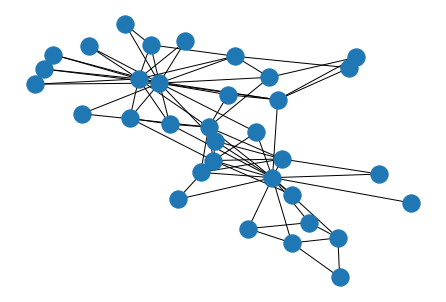

In [5]:
G = nx.karate_club_graph()
# print("Node Degree")
# for v in G:
#     print('%s %s' % (v, G.degree(v)))

nx.draw(G)
# nx.draw_circular(G, with_labels=True)
plt.show()

In [6]:
g_cs = nx.readwrite.json_graph.cytoscape_data(G)

In [7]:
g = nx.karate_club_graph()
g_cs = nx.readwrite.json_graph.cytoscape_data(g)

app = JupyterDash('YourAppExample')

app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape',
        elements=g_cs['elements']['nodes'] + g_cs['elements']['edges'],
        style={'width': '100%', 'height': '350px'},        
        
#         [
#             {'data': {'id': 'one', 'label': 'Node 1'}, 'position': {'x': 50, 'y': 50}},
#             {'data': {'id': 'two', 'label': 'Node 2'}, 'position': {'x': 200, 'y': 200}},
#             {'data': {'source': 'one', 'target': 'two','label': 'Node 1 to 2'}}
#         ],
         layout={'name': 'cose'}
    )
])

app

NameError: name 'JupyterDash' is not defined

In [ ]:
app.

In [44]:
app.height, app.width

(600, 800)

In [43]:
dir(app)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__html__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_layout',
 '_repr_html_',
 '_set_layout',
 'add_external_link',
 'app_state',
 'as_dash_instance',
 'callback',
 'dd',
 'expanded_callback',
 'frame',
 'gav',
 'get_app_root_url',
 'get_base_pathname',
 'get_session_state',
 'handle_current_state',
 'have_current_state_entry',
 'height',
 'layout',
 'local_uuid',
 'process_view',
 'rv_',
 'rv__dash_component_suites',
 'rv__dash_dependencies',
 'rv__dash_layout',
 'rv__dash_update_component',
 'session_id',
 'session_state',
 'set_session_state',
 'update_current_state',
 'use_nbproxy',
 'width']

In [ ]:
cyto.Cytoscape()

```html
<font color=blue|red|green|pink|yellow>Text</font>```


foo <font color='red'>bar</font> foo

This <span style="color:red">word</span> is not black.

$\color{red}{\text{ciao}}$

<div class="alert alert-block alert-warning">
<b>Example:</b> These is the content of the box. Here is my list:
- item 1
- item 2
</div>

<br/> next <em class="qs"/> qs line 
<br/> next <em class="an"/> an line 
<br/> next <em class="df"/> df line 
<br/> next <em class="ex"/> ex line 
<br/> next <em class="pl"/> pl line 
<br/> next <em class="mn"/> mn line 
<br/> next <em class="plmn"/> plmn line 
<br/> next <em class="hn"></em>  hn line 

----

* <em class="pl"></em> 
* <em class="mn"></em> 


<em class="cb">Текст</em>

<br/> next <em class="qs"/> qs line 
<br/> next <em class="an"/> an line 
<br/> next <em class="df"/> df line 
<br/> next <em class="ex"/> ex line 
<br/> next <em class="pl"/> pl line 
<br/> next <em class="mn"/> mn line 
<br/> next <em class="plmn"/> plmn line 
<br/> next <em class="hn"></em>  hn line 

----

* <em class="pl"></em> 
* <em class="mn"></em> 


<em class="cb">Текст</em>

<br/> next <em class="qs"/> qs line 
<br/> next <em class="an"/> an line 
<br/> next <em class="df"/> df line 
<br/> next <em class="ex"/> ex line 
<br/> next <em class="pl"/> pl line 
<br/> next <em class="mn"/> mn line 
<br/> next <em class="plmn"/> plmn line 
<br/> next <em class="hn"></em>  hn line 

----

* <em class="pl"></em> 
* <em class="mn"></em> 


<em class="cb">Текст</em>

In [ ]:
label propagation

In [71]:
%%html
<style>


b.n {
    font-weight: normal;        
}

b.grbg {
    background-color: #a0a0a0;      
}

b.r {
    color: #ff0000;    
}


b.b {    
    color: #0000ff;    
}

b.g {
    color: #00ff00;    
}


// add your CSS styling here

list-style: none;

ul.s {
//    list-style-type: none;
    list-style: none;
//    background-color: #ff0000;  
//    color: #ffff00;
//  padding-left: 1.2em;
//  text-indent: -1.2em;
}

li.t {
    list-style: none;
//  padding-left: 1.2em;
//  text-indent: -1.2em;    
}


*.r {
    color: #ff0000;    
}

li.t:before {
    content: "\21D2";    
//    content: "►";
//    padding-left: -1.2em;    
    text-indent: -1.2em;    
    display: block;
    float: left;
    
    
//    width: 1.2em;
//    color: #ff0000;
}

i.m:before {
    font-style: normal;    
    content: "\21D2";  
}
i.m {
    font-style: normal; 
}    

/*--------------------*/
/* em {
    font-style: normal; 
} */


em.bl {
    font-style: normal;     
    font-weight: bold;        
}

/* em.grbg {
    font-style: normal;         
    background-color: #a0a0a0;      
} */

em.cr {
    font-style: normal;         
    color: #ff0000;    
}

em.cb {    
    font-style: normal;         
    color: #0000ff;    
}

em.cg {
    font-style: normal;         
    color: #00ff00;    
}

/*--------------------*/

em.qs {
    font-style: normal; 
}

em.qs::before {
    font-weight: bold;    
    color: #ff0000;    
    content: "Q:";  
}

em.an {
    font-style: normal; 
}

em.an:before {
    font-weight: bold;    
    color: #0000ff;    
    content: "A:";  
}
    
em.ex {
    font-style: normal; 
}

em.ex:before {
    font-weight: bold;    
    color: #00ff00;    
    content: "Ex:";  
} 
    
em.df {
    font-style: normal; 
}

em.df:before {
    font-weight: bold;    
    color: #000000;    
    content: "Def:";  
}    

em.pl {
    font-style: normal; 
}

em.pl:before {
    font-weight: bold;    
    color: #0000ff;    
    content: "+";  
}    

em.mn {
    font-style: normal; 
}

em.mn:before {
    font-weight: bold;    
    color: #0000ff;    
    content: "-";  
}        

em.plmn {
    font-style: normal; 
}

em.plmn:before {
    font-weight: bold;    
    color: #0000ff;    
    content: "\00B1";\\"&plusmn;";  
}
    
em.hn {
    font-style: normal; 
}

em.hn:before {
    font-weight: bold;    
    color: #0000ff;    
    content: "\21D2";\\"&rArr;";  
}     
    
</style>

<br/> next <em class="qs"/> qs line 
<br/> next <em class="an"/> an line 
<br/> next <em class="df"/> df line 
<br/> next <em class="ex"/> ex line 
<br/> next <em class="pl"/> pl line 
<br/> next <em class="mn"/> mn line 
<br/> next <em class="plmn"/> plmn line 
<br/> next <em class="hn"/> hn line 

my <em class="qs"></em> mark to <em class="qs"></em> tag

* <em class="qs"></em> пример (кейс)
* <em class="qs"></em> пример (кейс)


* <em class="df"></em> Определение
* <em class="ex"></em> пример (кейс)
* <em class="qs"></em> вопрос (проблема)
* <em class="an"></em> ответ
* Алгоритм:
    * <em class="cr">S1:</em> Шаг 1
    * <em class="cr">S2:</em> Шаг 2
* Свойства:
    * <em class="cr">P1:</em> Свойство 1
    * <em class="cr">P2:</em> Свойство 2
* Утверждение
    * <em class="hn"/> следствие
* Свойства:
    * <em class="pl"></em> положительные
    * <em class="mn"></em> отрицательные
    * <em class="plmn"></em> смешанные


<ul class="s">
  <li class="t r">Home</li>
  <li>News <b class="r n">red </b> and <b class="g">green </b> and <b class="b n">blue</b> and __selected__</li> 
<!--  <li>News <b color='red'>red </b> and <b class="g">green </b> and <b class="b n">blue</b> and __selected__</li>    -->
  <li>A &#x21D2; b &rArr; c &blacktriangleright; Contact</li>
  <li>&esim; &sim; &asymp; &plusmn; About</li>
</ul>

* __Def:__ Определение
* <b class="g">Ex:</b> пример (кейс)
* <b class="r">Q:</b> вопрос (проблема)
* <b class="b">A:</b> ответ
* Алгоритм:
    * <b class="r">S1:</b> Шаг 1
    * <b class="r">S2:</b> Шаг 2
* Свойства:
    * <b class="r">P1:</b> Свойство 1
    * <b class="r">P2:</b> Свойство 2
* Утверждение
    * <b class="b">&rArr;</b> следствие
* Свойства:
    * <b class="b grbg">+</b> положительные
    * <b class="b">-</b> отрицательные
    * <b class="b">&plusmn;</b> смешанные

In [43]:
%%html
my <cb> mark </cb> tag


In [ ]:
/* ul {
  list-style-type: none;
  margin: 0;
  padding: 0;
  overflow: hidden;
  background-color: #333333;
}

li {
  float: left;
}

li a {
  display: block;
  color: white;
  text-align: center;
  padding: 16px;
  text-decoration: none;
}

li a:hover {
  background-color: #111111;
} */